In [2]:
import vectorbt as vbt
import numpy as np

In [3]:
symbols = ["BTC-USD"]
price = vbt.YFData.download(symbols, missing_index='drop').get('Close')
# TODO Time zone
price

Date
2014-09-17 00:00:00+00:00      457.334015
2014-09-18 00:00:00+00:00      424.440002
2014-09-19 00:00:00+00:00      394.795990
2014-09-20 00:00:00+00:00      408.903992
2014-09-21 00:00:00+00:00      398.821014
                                 ...     
2023-09-03 00:00:00+00:00    25969.566406
2023-09-04 00:00:00+00:00    25812.416016
2023-09-05 00:00:00+00:00    25779.982422
2023-09-06 00:00:00+00:00    25753.236328
2023-09-07 00:00:00+00:00    25658.904297
Freq: D, Name: Close, Length: 3278, dtype: float64

In [5]:
(in_sample_prices, in_sample_dates), (out_sample_prices, out_sample_dates) = price.vbt.rolling_split(
    n=28,
    window_len=360,
    set_lens=(108, ),
    left_to_right=False
    )

'''''
print(in_sample_prices[0][100:120])
print(in_sample_prices[1][:10])
print(out_sample_prices[0][:10])
'''


"''\nprint(in_sample_prices[0][100:120])\nprint(in_sample_prices[1][:10])\nprint(out_sample_prices[0][:10])\n"

/Users/chuchihsheng/anaconda3/envs/venv310/lib/python3.10/site-packages/jupyter_client/session.py:719: UserWarning:

Message serialization failed with:
Out of range float values are not JSON compliant
Supporting this message is deprecated in jupyter-client 7, please make sure your message is JSON-compliant

/Users/chuchihsheng/anaconda3/envs/venv310/lib/python3.10/site-packages/jupyter_client/session.py:719: UserWarning:

Message serialization failed with:
Out of range float values are not JSON compliant
Supporting this message is deprecated in jupyter-client 7, please make sure your message is JSON-compliant



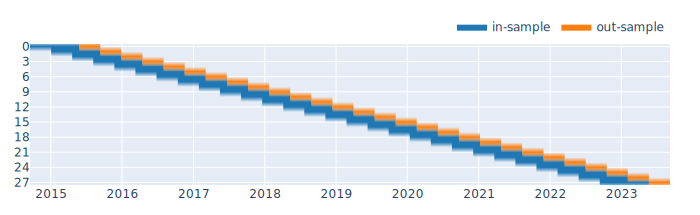

In [6]:
price.vbt.rolling_split(
    n=28,
    window_len=360,
    set_lens=(108, ),
    left_to_right=False,
    plot=True,
    trace_names=['in-sample', 'out-sample']
    ).show_svg()

In [7]:
fast_ma, slow_ma = vbt.MA.run_combs(in_sample_prices, window=np.arange(1, 25), r=2, short_names=['fast', 'slow'])

entries = fast_ma.ma_crossed_above(slow_ma)
exits = fast_ma.ma_crossed_below(slow_ma)

entries

fast_window     1                                                           \
slow_window     2                                                            
split_idx       0      1      2      3      4      5      6      7      8    
0            False  False  False  False  False  False  False  False  False   
1            False  False  False  False  False  False  False  False  False   
2            False   True   True   True   True  False  False  False  False   
3             True  False  False  False  False   True  False   True  False   
4            False  False  False   True  False  False   True  False  False   
..             ...    ...    ...    ...    ...    ...    ...    ...    ...   
247          False  False  False   True   True  False  False  False  False   
248          False  False  False  False  False  False   True  False  False   
249           True  False  False  False  False   True  False   True   True   
250          False   True   True  False  False  False  False  False  False   
251           True  False  False   True  False  False  False  False  False   

fast_window         ...     23                                            \
slow_window         ...     24                                             
split_idx       9   ...     18     19     20     21     22     23     24   
0            False  ...  False  False  False  False  False  False  False   
1            False  ...  False  False  False  False  False  False  False   
2            False  ...  False  False  False  False  False  False  False   
3            False  ...  False  False  False  False  False  False  False   
4            False  ...  False  False  False  False  False  False  False   
..             ...  ...    ...    ...    ...    ...    ...    ...    ...   
247          False  ...  False  False  False  False  False  False  False   
248          False  ...  False  False  False  False  False  False  False   
249          False  ...  False  False  False  False  False  False  False   
250          False  ...  False  False  False  False  False   True  False   
251          False  ...  False  False  False  False  False  False  False   

fast_window                       
slow_window                       
split_idx       25     26     27  
0            False  False  False  
1            False  False  False  
2            False  False  False  
3            False  False  False  
4            False  False  False  
..             ...    ...    ...  
247          False  False  False  
248          False  False  False  
249           True  False  False  
250          False  False  False  
251          False  False  False  

[252 rows x 7728 columns]

In [8]:
pf = vbt.Portfolio.from_signals(in_sample_prices, entries, exits)
res = pf.total_return()
#print(res)
#pf.plot().show()
print(res[res.groupby('split_idx').idxmax()].index)

MultiIndex([( 4, 10,  0),
            ( 1,  8,  1),
            ( 5,  7,  2),
            ( 5,  7,  3),
            ( 4,  5,  4),
            ( 4,  5,  5),
            ( 1,  7,  6),
            ( 1,  7,  7),
            ( 1,  5,  8),
            ( 1,  5,  9),
            ( 1, 14, 10),
            ( 1,  4, 11),
            ( 1,  4, 12),
            (18, 20, 13),
            (17, 18, 14),
            ( 1, 17, 15),
            (18, 21, 16),
            (18, 20, 17),
            (15, 21, 18),
            (15, 20, 19),
            ( 1, 10, 20),
            ( 2,  8, 21),
            ( 4, 19, 22),
            ( 7, 16, 23),
            ( 9, 10, 24),
            (12, 20, 25),
            ( 2,  3, 26),
            ( 1, 13, 27)],
           names=['fast_window', 'slow_window', 'split_idx'])
